In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from itertools import product

%matplotlib inline

In [2]:
# general setup

# agent must move to match self position and target position

# rewards are -1 for every time point

In [7]:
# Q LEARNING

ALPHA = .5 # update wait
EPSILON=0.1 # epsilon - greedy exploration
EPISODES = 10000 # num training episodes
NPIXELX,NPIXELY = 10,10 # 




In [8]:
# define agent class
class hand():
    def __init__(self, npixely, npixelx):
        self.hand_pos = [0,0]
        self.targ_pos = [None,None]
        self.npixelx = npixelx
        self.npixely = npixely
        self.wind = False
        self.wind_vec=[0,0]
        self._init_qfunc()
        
        self.actions = [[-1,0],
                       [1,0],
                       [0,-1],
                       [0,1],
                       [-1,-1],
                       [1,-1],
                       [-1,1],
                       [1,1]]
        
    def _init_qfunc(self):
        self.Q = {}
        for hposy in range(self.npixelx):
            for hposx in range(self.npixely):
                self.Q[(hposy,hposx)]= np.random.randn(8)
                
#                 for tposy in range(self.npixelx):
#                     for tposx in range(self.npixely):
#                         self.Q[(hposy,hposx)][(tposy,tposx)]= np.random.randn(8)
                        
    def init_hand_pos(self,y,x):
        self.hand_pos = [y,x]
    def update_hand_pos(self,dy,dx):
        self.hand_pos=[np.minimum(np.maximum(self.hand_pos[0]+dy,0),self.npixely-1),np.minimum(np.maximum(self.hand_pos[1]+dx,0),self.npixelx-1)]
        
    def init_targ_pos(self,y,x):
        self.targ_pos=[y,x]
                                
   
    def get_Q(self,hpos):
        return self.Q[tuple(hpos)]

    
    
                        



In [39]:
# init agent
h = hand(NPIXELY,NPIXELX)

# init Q function np.random.randn(gridpos_agent x gridpos_target x # of actions available) or as dictionary with [state][action] keys


In [40]:
rewards = []
counter = 0
COUNTERS = []


for ep in range(EPISODES):

    # init state
    h.init_hand_pos(np.random.randint(NPIXELY),np.random.randint(NPIXELX))
    h.init_targ_pos(8,5)

    #     define terminal state
    if ep%1000 ==0:
        print('episode',ep,counter)

    counter = 0
    while h.hand_pos != h.targ_pos:

        # choose action using Q[state] epsilon greedy
        if np.random.rand()<EPSILON:
            a = np.random.randint(8)
        else:
            a= np.argmax(h.get_Q(h.hand_pos))

    
    #         print('a',ay,ax)
        h_old = h.hand_pos[:]
        action = h.actions[a]
        h.update_hand_pos(action[0],action[1])
        
        
        if h.hand_pos != h.targ_pos:
            reward = -1
            reward = -(h.hand_pos)
        else:
            reward = 0
        rewards.append(reward)
        h.Q[tuple(h_old)][a] += ALPHA*(reward + np.amax(h.get_Q(h.hand_pos)) - h.get_Q(h_old)[a])

        counter+=1
    COUNTERS.append(counter)

    

episode 0 0
episode 1000 4
episode 2000 5
episode 3000 2
episode 4000 3
episode 5000 5
episode 6000 5
episode 7000 3
episode 8000 6
episode 9000 3


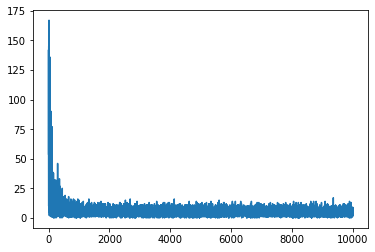

In [41]:
f,ax = plt.subplots()
# print(rewards)
ax.plot(COUNTERS[:])

In [20]:
for it in range(20):
hand_pos = []
h.init_hand_pos(0,5)
hand_pos.append(h.hand_pos[:])
while h.hand_pos != h.targ_pos:
    # choose action using Q[state] epsilon greedy
    a = np.argmax(h.get_Q(h.hand_pos))
#     print(h.hand_pos)
    h.update_hand_pos(*h.actions[a])
    counter+=1
    hand_pos.append(h.hand_pos[:])

[[0 5]
 [1 5]
 [2 5]
 [3 5]
 [4 5]
 [5 5]
 [6 5]
 [7 5]
 [8 5]]


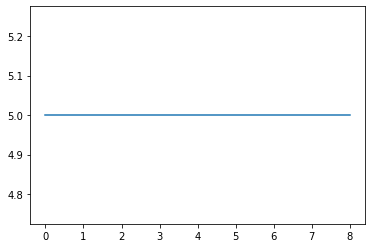

In [22]:
hand_pos = np.array(hand_pos)
print(hand_pos)
f,ax = plt.subplots()

ax.plot(hand_pos[:,0],hand_pos[:,1])

In [32]:
h_wind = hand(NPIXELY,NPIXELX)
rewards = []
counter = 0
COUNTERS = []


for ep in range(EPISODES):

    # init state
    h_wind.init_hand_pos(0,5)
    h_wind.init_targ_pos(8,5)

    #     define terminal state
    if ep%1000 ==0:
        print('episode',ep,counter)

    counter = 0
    while h_wind.hand_pos != h_wind.targ_pos:

        # choose action using Q[state] epsilon greedy
        if np.random.rand()<EPSILON:
            a = np.random.randint(8)
        else:
            a= np.argmax(h_wind.get_Q(h_wind.hand_pos))

    
    #         print('a',ay,ax)
        h_old = h_wind.hand_pos[:]
        action = h_wind.actions[a][:]
        
        # add wind - blows up between 3 and 5
        if (h_wind.hand_pos[0]>=3) and (h_wind.hand_pos[0]<=5):
            action[1]-=1
#             print(action)
        
        
        h_wind.update_hand_pos(action[0],action[1])
        
#         print(h_old,h_wind.hand_pos,action)
        if h_wind.hand_pos != h_wind.targ_pos:
            reward = -1
        else:
            reward = 0
        rewards.append(reward)
        h_wind.Q[tuple(h_old)][a] += ALPHA*(reward + np.amax(h_wind.get_Q(h_wind.hand_pos)) - h_wind.get_Q(h_old)[a])

        counter+=1
    COUNTERS.append(counter)

episode 0 0
episode 1000 8
episode 2000 12
episode 3000 8
episode 4000 8
episode 5000 8
episode 6000 8
episode 7000 8
episode 8000 8
episode 9000 10


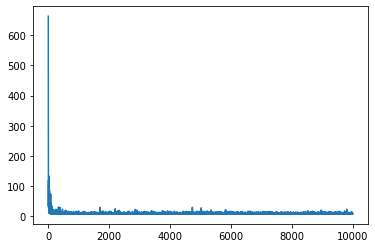

In [33]:
f,ax = plt.subplots()
ax.plot(COUNTERS)

In [34]:
hand_pos = []
h_wind.init_hand_pos(0,5)
hand_pos.append(h_wind.hand_pos[:])
while h_wind.hand_pos != h_wind.targ_pos:
    # choose action using Q[state] epsilon greedy
    a = np.argmax(h_wind.get_Q(h_wind.hand_pos))
#     print(h.hand_pos)
    action = h_wind.actions[a][:]
        
    # add wind - blows up between 3 and 5
    if (h_wind.hand_pos[0]>=3) and (h_wind.hand_pos[0]<=5):
        action[1]-=1
    h_wind.update_hand_pos(action[0],action[1])
    hand_pos.append(h_wind.hand_pos[:])

[[0 5]
 [1 5]
 [2 5]
 [3 5]
 [4 4]
 [5 3]
 [6 3]
 [7 4]
 [8 5]]


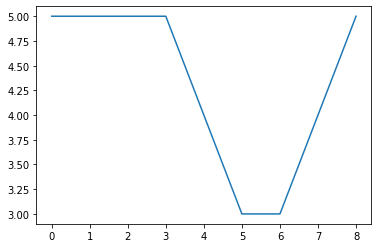

In [35]:
hand_pos = np.array(hand_pos)
print(hand_pos)
f,ax = plt.subplots()
ax.plot(hand_pos[:,0],hand_pos[:,1])